In [ ]:
# 여러 모델들에서 모델의 복잡도가 어떤 역할을 하는지 이야기하고 각 알고리즘들이 모델을 어떻게 만드는지 학습해보겠음
# 또한, 모델들의 장단점을 파악하고, 모델별로 어떤 데이터가 잘 들어맞을지 살펴 볼 것임
# 분류와 회귀 모델을 모두 가지고 있는 알고리즘도 많은데 이런 경우 둘다 살펴 볼 것임

In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = 'fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))
import time
print(time.gmtime())

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1

time.struct_time(tm_year=2020, tm_mon=2, tm_mday=6, tm_hour=8, tm_min=1, tm_sec=9, tm_wday=3, tm_yday=37, tm_isdst=0)


# 이진분류(classification)_forge dataset_시각화

In [2]:
# forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋임

X.shape (26, 2)


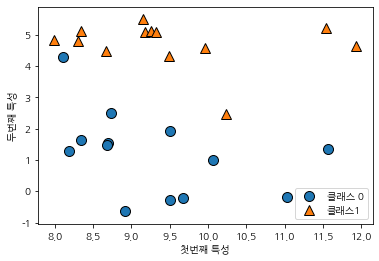

In [3]:
# dataset setting
X, y = mglearn.datasets.make_forge()
# 산점도를 그림 discrete_scatter 2차원 산점도 그래프를 위한..
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# help(mglearn.discrete_scatter)
# x1 : nd-array input data, first axis
# x2 : nd-array input data, second axis
# y : nd-array input data, discrete labels
plt.legend(['클래스 0', '클래스1'], loc =4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape',X.shape)
# dataset은 데이터26개(포인터)와 2개의 특성을 가짐

# 회귀(regression)_wave dataset_시각화

In [ ]:
# wave dataset : 입력특성 한 종류와 모델링을 위한 타깃변수(출력)을 가짐
# x축 : 입력 특성
# y축 : 회귀(regression)의 출력(타깃변수)

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
# n_sample : 입력 특성의 갯수
plt.plot(X,y,'o')
plt.ylim(-2.8,2.5)
# y축 범위 세팅 
plt.xlabel('특성')
plt.ylabel('타깃')

# 유방암 데이터셋

In [ ]:
from sklearn.datasets import load_breast_cancer
# 유방암 데이터셋
# 각 종양은 양성종양(benign) 악성종양(malognant)로 나뉨(label화)
# 조직 데이터를 기반으로 종양이 악성인지 예측하는 것을 목표로 하겠음

cancer = load_breast_cancer()
print('type : ' + str(type(cancer)))
# scikit-learn에 포함된 데이터셋은 실제 데이터와 관련 정보를 가진 Bunch 객체에 저장되어 있음

In [ ]:
# Bunch객체는 Dictionary와 비슷하지만, 점표기법(EX_.keys())을 사용할 수 있음
# ex) bunch['key'] 대신 bunch.key 가능
print('cancer.keys():\n',cancer.keys())
print('\n\ncancer.data:\n',cancer.data)
print('\n\ncancer.data:\n',cancer['data'])
# 동일하게 기능하는 것을 알 수 있다

In [ ]:
print('유방암 데이터의 형태 : ', str(cancer.data.shape) + '\n569개의 데이터포인트와 30개의 특성을 가지고 있음')

In [ ]:
print(cancer.target_names)
# 클래스 분류명
print(type(cancer.target))
print('0 : 악성, 1 : 양성 \n'+'[0,1]'+str(np.bincount(cancer.target)))
# 212 악성, 357 양성 종양
# bincount(~~)
#count of zeros is at first_index -> '0'
#count of ones is at second_index -> '1'

In [ ]:
x = cancer.target
print(collections.Counter(x))
# collections.Counter()사용
print(np.count_nonzero(x))
# Numpy_count_nonzero 메소드 사용
print('클래스(분류)별 샘플 갯수  :\n',
     {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

print('리스트 내부 포문 사용 하지 않을 시')
for n,v in zip(cancer.target_names, np.bincount(cancer.target)):
    print(n,v)

# 보스턴 주택가격 데이터셋(회귀분석)

In [ ]:
# 이 데이터셋을 이용, 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해
# 1970년대 보스턴 주택 평균 가격을 예측하는 것
# 데이터 포인트 506, 특성 13

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태',boston.data.shape)

In [ ]:
# 마찬가지로 boston 객체의 DESCR 속성에서 정보 확인 가능
# 이 데이터셋에서 13개의 입력 특성뿐만 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장할 것
# ex) 범죄율과 고속도로의 접근성의 개별 특성은 물론, 범죄율과 고속도로의 접근성의 곱의 벨류도 특성으로 생각한다는 것
# 이처럼 특성을 유도해내는 것을 특성 공학(feature engineering)이라함

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
# 13개의 특성, 중복을 허용한 특성의 곱에 원래 특성을 더해 총 104개의 특성을 가지게 됨
# 첫번째 특성으로 13개의 교차항이 만들어지고, 두번째 특성에서 첫번째 특성을 제외한 12개의 교차항이 ..(조합)
# 중복을 포함한 조합을 만듬 -> scikit-learn의 PolynomialFeatures 함수 사용


In [ ]:
# 조합(이항계수)_중복을 포함한경우의
# (13+12+11 ... +1 = 91) 91+13 < 중복을 포함해야 하므로
# 이항계수(Binomial Coefficient)는 조합론에서 등장하는 개념으로 주어진 크기 집합에서 원하는 개수만큼 순서없이 뽑는 조합의 가짓수를 일컫는다. 
# 2를 상징하는 ‘이항’이라는 말이 붙은 이유는 하나의 아이템에 대해서는 ‘뽑거나, 안 뽑거나’ 두 가지의 선택만이 있기 때문

In [ ]:
print('이항계수 공식')
Image("./img/이항계수 공식.png") # code안에서 나오게 할 때

In [ ]:
print('이항계수 성질')
Image("./img/이항계수 성질.png")

# KNN

In [ ]:
# 가장 간단하 머신러닝 알고리즘
# 훈련 데이터 셋을 저장하는 것이 모델을 만드는 과정의 전부
# 복습) 새로운 데이터 포인트에 대한 예측을 할땐, 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인터, 즉 '최근접이웃'을 찾음

In [ ]:
# forge 데이터셋에 대한 1-KNN 모델 예측 시각화
mglearn.plots.plot_knn_classification(n_neighbors=1)
# mglearn 라이브러리->plots들..->plot_knn분류
# 추가한 데이터 포인터 3개 별모양
# 그리고 추가한 데이터 포인터로 부터 가장 가까운 훈련 데이터 포인트를 연결함
# 1-KNN 알고리즘의 예측은 연결된 데이터 포인트에 연관되어 집니다(연결선)
# 1-KNN predict: blue, orange, blue

In [ ]:
# forge 데이터셋에 대한 5-KNN 모델 예측 시각화
mglearn.plots.plot_knn_classification(n_neighbors=5)
# 연결된 데이터 포인트(이웃)의 색과 수에 따라서 예측 결과값은 달라짐
# 5-KNN predict : orange, orange, blue

In [ ]:
# 위의 데이터 셋은 이진 분류 문제지만, 클래스가 다수인 데이터셋에도 KNN을 적용할 수 있음

# KNN 적용, KNeighborsClassifier 분석(시각화)

In [ ]:
# scikit-learn을 이용 k-NN 적용법을 살펴보겠음
# 모델의 일반화 성능을 평가하기 위해서 훈련세트, 테스트 세트 세팅
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# 이 함수를 여러번 실행해도 같은 결과가 나오도록 유사 난수 생성기에 넣을 난수 초기값을 random_state 매개변수로 0 전달

# KNeighborsClassifier import 객체 생성
from sklearn.neighbors import KNeighborsClassifier # sklenarn의 KNN(이웃..)

clf_test = KNeighborsClassifier(n_neighbors=3) # Classifier 매개변수(이웃3), 객체 생성 메소드
clf_test.fit(X_train, y_train) # 학습

print('test data 예측 : '+ str(clf_test.predict(X_test)))
print('train data score : {:.2f}'.format(clf_test.score(X_train, y_train)))
print('test data score : {:.2f}'.format(clf_test.score(X_test, y_test)))

In [ ]:
# 2차원 데이터 셋이므로 모든 테스트 포인트의 예측을 xy 평면에 그릴 수 있음
# 각 클래스 분류에 따라 다른 색을 칠하여 클래스분류의 경계 (결정 경계_decision boundary)를 볼 수있음
# n_neighbor 의 매개변수 (즉, 이웃의 수)가 1,3,9 개 일때의 차이를 시각해서 보여보자
fig, axes = plt.subplots(1,3, figsize = (10,3))
# plt.subplots() 함수에 대한 정리(공부)machine/libs_study/matplotlib_pyplot(as_plt)/plt_subplots().ipynb 참조

for n_neighbors, ax in zip([1,3,9], axes):
    # fit 메소드는 자기자신(self object)을 다시 리턴하기 때문(갱신)
    # 객체 생성 메소드와 fit 메소드 한줄에 작성 가능
    clf_forge = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    
    # 2차원 plots 메소드, default 매개변수 
    # plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
    # cm=<matplotlib.colors.ListedColormap object at 0x1220c8b10>, linewidth=None, threshold=None, linestyle='solid')
    mglearn.plots.plot_2d_separator(clf_forge, X, fill=True, eps = 0.5, ax=ax, alpha=0.4)
    
    # 산점도
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    
    # axes(array) 안의 ax들 setting _ (ax == matplotlib.axes._subplots.AxesSubplot object)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
    ax.legend() # 라벨링 플레이싱

In [ ]:
# 1이웃의 경우 결정 경계가 훈련데이터를 주로 따라가고
# 이웃이 늘어날 수록 경계는 부드러워 짐을 알 수 있음
# 부드러운 경계는 더 단순한 모델을 의미함, 다시 말해 이웃을 적게 사용하면 모델의 복잡도는 높아지고
# 많이 사용하면 모델의 복잡도는 낮아짐
# 극단적으로 훈련 데이터 포인터의 전체 갯수를 이웃으로 지정하게 되면 모든 테스트 포인트가 같은 이웃을 가지게됨
# 그러므로 테스트 포인트에 대한 예측은 모두 같은 값이 될것임
# 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨

In [ ]:
# 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴보겠음
# 유방암 데이터셋 사용, 이웃의 수를 바꿔가며 훈련 세트와 테스트 세트의 성능을 평가
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# 참조 machine/libs_study/sklearn.model_selection_study/train_test_split_study.ipynb

training_accuracy = []
test_accuracy = []

# 1 ~ 10 까지 이웃갯수 사용
neighbors_setting = range(1,11)
for n_neighbors in neighbors_setting:
    clf_cancer = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train) # 모델 생성, 저장
    training_accuracy.append(clf_cancer.score(X_train,y_train)) #훈련 세트 스코어 저장
    test_accuracy.append(clf_cancer.score(X_test,y_test)) # 테스트 세트(일반화) 스코어 저장

In [ ]:
plt.plot(neighbors_setting, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_setting, test_accuracy, label='테스트 정확도')
plt.legend()

In [ ]:
# 이웃수(x축)에 따른 훈련, 테스트 정확도(y축)을 보여주는 그래프
# 실제로 이렇게 매끄러운 그래프는 나오지 않지만
# 여기서도 과적합 과소적합의 특징을 볼 수있음
# 이웃의 수가 적어질 수록 모델이 복잡히지므로, 그래프는 수평으로 뒤집힌 형태이며
# 이웃의 수가 하나일때 훈련 데이터에 과적합, 이웃의 수가 늘어날 수록 모델은 단순해지며
# 훈련 데이터의 정확도는 줄어듬, 하지만 테스트 정확도의 그래프도 참조해야함
# 반대로 이웃을 10개 사용하였을 경우 모델이 너무 단순해져서 정확도가 낮아짐을 알 수가 있음
# 가장 최적점을 찾아보면 6개 정도의 이웃을 사용한 KNN이 적합하다고 이 시각화에서 볼 수 있다

# KNN 회귀

In [ ]:
# KNN 알고리즘은 회귀 분석(Regression)에도 쓰임
# wave dataset 사용
# 3개의 test data, 초록 star 모양 표시
# 이웃이 하나일때는 그냥 가장 가까운 이웃의 타깃값으로 예측..(진한별)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
# feature 값을 입력으로 target 값을 예측한 그래프를 볼 수 있다.. 회귀 문제기 때문에 선형

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 여러개의 최근접 이웃을 사용하면 이웃의 평균*이 예측이 됨
# * KNeighborsRegressor 의 가중치 매개변수가 uniform_default 일때는 np.mean 함수로 단순 평균 계산
# * 가중치 매개변수가 distance 일때는 거리를 고려한 가중치 평균(average)를 계산함

In [ ]:
# scikit-learn에서 회귀를 위한 KNN 알고리즘은 KNeighborsRegressor 에 구현되어 있음
# 사용법은 KNeighborsClassifier 와 유사함
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0) # 고정 split
# X_train, X_test, y_train, y_test = train_test_split(X,y) # 유동 split << 결정계수의 값(score) 편차 심하게 나옴
reg_wave = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

print('test set pridict:\n', np.round_(reg_wave.predict(X_test), 3))
# 테스트 세트 예측 출력

print('test set R^2 : ')
# score 메서드를 사용해 모델 평가 가능, score 메서드는 회귀 일때 R^2(제곱) 값을 반환함
# R^2(결정 계수), 회귀 모델에서 예측의 적합도를 측정한 것
# 보통 0-1 사아의 값을 가짐. 1은 predict가 완벽한 경우이고
# 0은 훈련세트의 출력 값인 y_train 의 평균으로만 예측하는 경우에 나타남
    ## y_train 의 평균 값을 예측으로 사용하면, R^2 공식에서 타깃값의 평균과 모델의 예측값이 같게되고
    ## 분자와 분모 값이 같아져 최종 계산값은 0이 되기 때문
        ### 결정 계수 향후 서술
# R^2(결정 계수)는 음수가 나올 수도 있는데, 이는 예측과 타깃이 상반된 경향을 가지는 경우임
print('{:.2f}'.format(reg_wave.score(X_test,y_test)))
# 0.83의 스코어의 경우 대략 맞아들어간 정도라 생각

In [ ]:
# KNeighborsRegressor 분석
# 1차원 데이터셋(wave) 에 가능한 모든 특성 값을 만들어 예측해 볼 수 있음
# 이웃의 수에 따른 그래프를 3개 만들어보겠음
fig, axes = plt.subplots(1,3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
# -3과 3 사이에 1000개의 데이터 포인터를 만듬
# 파이썬 NumPy 에서 배열의 차원(Dimension)을 재구조화, 변경하고자 할 때 reshape() 메소드를 사용
# 가령, 3개의 행과 4개의 열로 구성된 2차원의 배열로 재설정하고 싶으면 reshape(3, 4) 처럼 
# reshape()의 매개변수로 변경하고자 하는 배열의 행과 열의 차원을 정수로 입력해주면됨
# reshape()의 매개변수중 '-1'이 의미하는 바는, 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"이 된다는 뜻

for n_neighbors, ax in zip([1,3,9], axes):
    # 이웃 1,3,9개
    reg_wave = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train,y_train)
    # axes(array) 안의 ax들 setting _ (ax == matplotlib.axes._subplots.AxesSubplot object)
    ax.plot(line, reg_wave.predict(line)) # ax 그래프에 line(-3, 3 데이터 1000개) 예측값
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8) # train data, 삼각형 모양
    ax.plot(X_test, y_test,'v', c = mglearn.cm2(1), markersize = 8) # test data , 역삼각형 
    # c='~~~' => 표기 도형 색상, marker size => 표기 도형 크기
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
    ax.legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc='best') # 라벨링 플레이싱 loc='best' 개꿀팁

In [ ]:
# 회귀의 경우 이웃을 하나 사용하게 되면, 훈련세트의 각 데이터 포인터에 예측이 과적합을 이루게됨 (불안정한예측)
# 이웃을 많이 사용하면, 훈련 데이터에는 잘 맞지 않아도 안정적인 데이터를 얻을 수 있음을 관찰할 수 있음

# KNN의 중요 매개변수

In [ ]:
# 일반적으로 KNN 분류기에 중요한 매개변수는 두개임
# 1. 데이터 포인터 사이의 거리를 재는 방법
    # Classifier, Regressor 의 객체를 생성할 때 metric 매개변수를 사용, 거리 측정 방식을 변경 가능
    # metric의 Default는 민코프스키 거리를 의미하는 'minkowski'이며
    # 거듭제곱의 크기를 정하는 매개변수인 p가 기본값 2일 때, 유클라디안 거리와 같음
    # 기본적으로 여러 환경에서 잘 작동하는 유클리디안 거리 방식을 사용함
# 2. 이웃의 수

# KNN의 장단점

In [ ]:
# 장점
# 매우 이해하기 쉬운 모델임
# 많이 조정하지 않아도 자주 좋은 성능을 보여주긴 함
# 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는(간단하게) 시작점이 될 수 있음_baseline

# 단점
# 보통 최근접 이웃 모델은 매우 빠르게 만들 수 있지만, 훈련 세트가 크면(특성의 수 or 샘플의 수) 예측의 속도가 느려짐 
# 또한 KNN의 경우, 데이터의 전처리 과정이 아주 중요함
# (수백 개 이상의) 많은 특성을 가진 데이터 셋에는 잘 동작하지 않음
# 특성 값이 대부분이 0인 (희소벡터, 희소특성..) 데이터셋과는 잘 작동하지 않음

# 총평 : 이해하기 쉽고 빠르게 제작이 가능하지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서 잘 사용하지 않음
# 이러한 단점을 선형 모델에서 극복해보도록 해보자